The dataset to be analysed is titanic dataset.

In [1]:
#Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read-in the two datasets- train and test
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.shape

(418, 11)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Baclini, Mrs. Solomon (Latifa Qurban)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Visualization

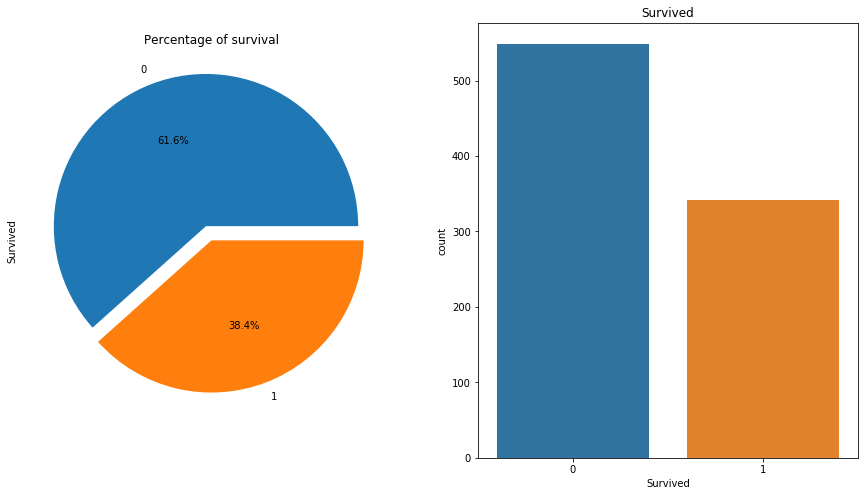

In [11]:
f,ax=plt.subplots(1,2,figsize=(15,8))
train_df['Survived'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Percentage of survival')
sns.countplot('Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

A higher percentage, 61.6% of passengers died out of a total of 891. With only 350 passengers i.e 38.4% survived. More insights is needed to know what category of people survived and who didn't.

Analysing each features

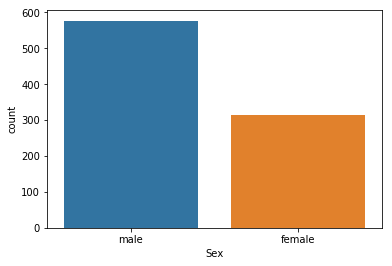

In [12]:
sns.countplot('Sex', data=train_df)
plt.show()


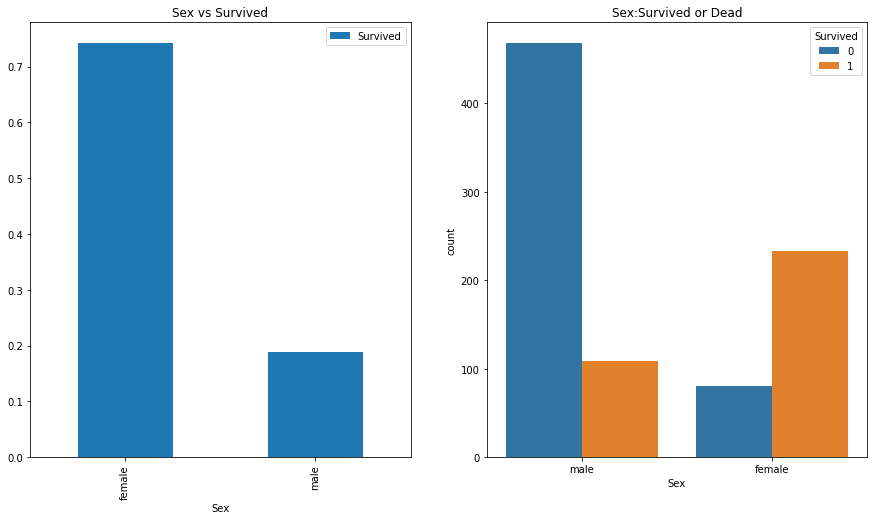

In [13]:
f,ax=plt.subplots(1,2,figsize=(15,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sex vs Survived')
sns.countplot('Sex', hue='Survived',data=train_df, ax=ax[1])
ax[1].set_title('Sex:Survived or Dead')
plt.show()

The number of men on the ship is a lot more than that of the women but still number of women saved doubled the number of men saved. Therefore the survival rate of women is about 75% while that of men isabout 18%.

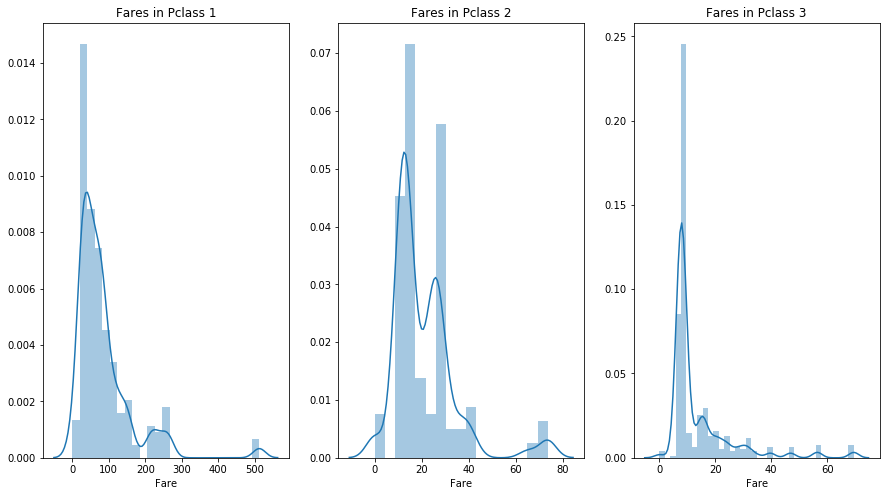

In [14]:
#Fare
f, ax=plt.subplots(1,3,figsize=(15,8))
sns.distplot(train_df[train_df['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

The lowest fare is 0.0 meaning a free ride
A wide range of distribution is seen in Pclass with fare as high as 500 
Pclass 2 has highest fare to be 80 with lots of people paying a fare ranging between 0 and 40 while
Pclass 3 has its highest fare to be 70 withmost people paying within range of 0 to 30

Summarily, fare decreased with Pclass from 1 to 2 to 3 respectively. So Pclass 1 can be referred to as first class passenger, Pclass 2 as second class and pclass 3 as third class or economy passengers

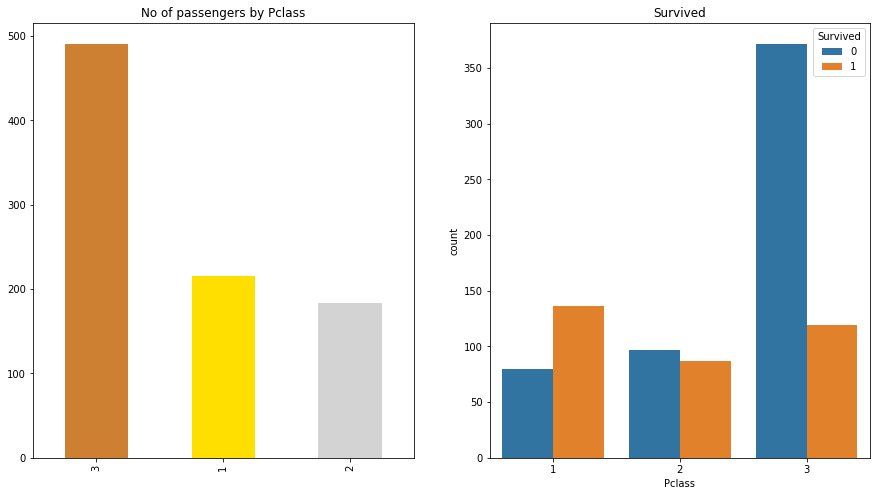

In [15]:
f,ax=plt.subplots(1,2,figsize=(15,8))
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('No of passengers by Pclass')
sns.countplot('Pclass', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Passengers of Pclass1 were given higher priority during rescue and has the higher survival rate of all even though Pclass=3 has the highest number of passengers but with the lowest survival rate  
Survival rate decreased in order of Pclass 1, Pclass 2, Pclass 3. So money and status appear to matters.

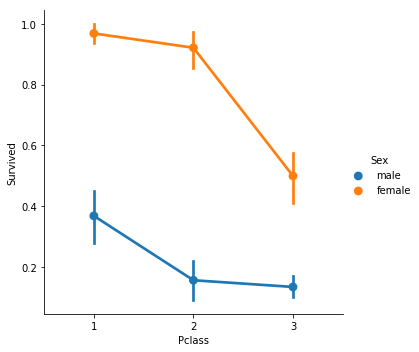

In [16]:
#Visualizing Survival rate with sex and pclass together
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_df)
plt.show()

We can see from the factorplot that irrespective of Pclass, women were given first priority to men during rescue.
Also women of Pclass 1 survived the most with percentage of about 95% while the men survived percentage of about 37%. Still men of Pclass 1 have highest survuval rate than other men of Pclass 2 and 3. 
This inference is still inline with the fact that money and status matters

(array([ 40.,  22.,  16.,  86., 114., 106.,  95.,  72.,  48.,  41.,  32.,
         16.,  15.,   4.,   6.,   1.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]),
 <a list of 16 Patch objects>)

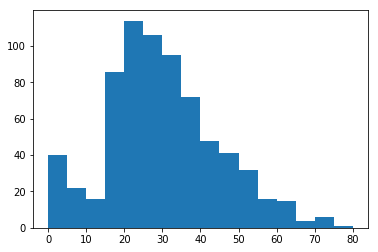

In [17]:
plt.hist('Age', data=train_df, bins=range(0,85,5))


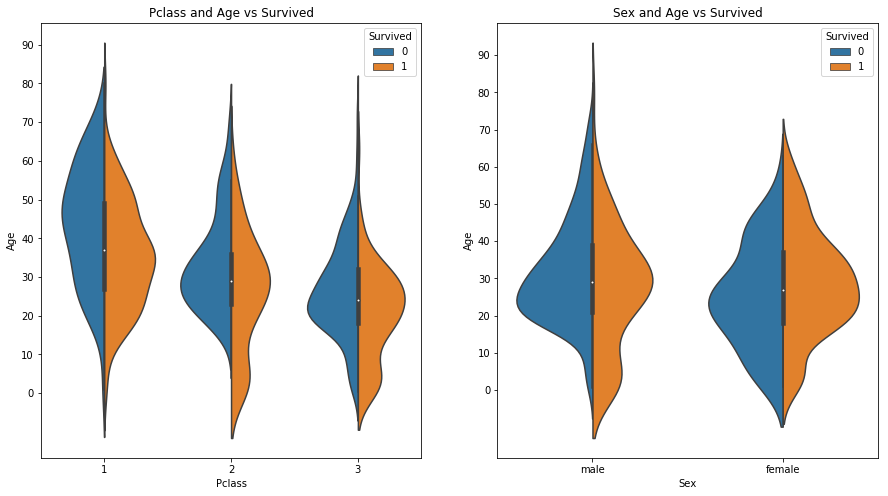

In [18]:
f, ax=plt.subplots(1,2, figsize=(15,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train_df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,100,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train_df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,100,10))
plt.show()

1)The number of chhildren increased from Pclass 1,2,3 respectively. The survival rate for passengers below 10 years are good irrespective of the Pclass they belong
2)Chances of Survival for passengers between Age 10 to 50 is high and more better for women
3)For the males, survival chances decrease with Age.

Age feature has 177 null values as seen earlier on. To replace the NaN values, we can insert the mean age of the dataset but looking at the age ranging from 0.45 to 80years, then we can't input an average age of 29.69years for a child of 1year nor for an person of 70yrs.
This problem can be solved by using the Name initials to generate an age band. Average for each age band is used to fill the missing values

In [19]:
#The initials or salutation is noticed to be written in sentence case with full stop(.) immediately after
train_df['Initials']=0
for i in train_df:
    train_df['Initials']=train_df.Name.str.extract('([A-Za-z]+)\.') #extracting the initials
    
test_df['Initials']=0
for i in test_df:
    test_df['Initials']=test_df.Name.str.extract('([A-Za-z]+)\.') #extracting the initials

In [20]:
#view what the initials are and what sex they refer to
#pd.crosstab(train_df['Sex'],train_df['Initials']).style.background_gradient(cmap='summer_r') ##Another way of writing it
pd.crosstab(train_df['Initials'], train_df['Sex']).T.style.background_gradient(cmap='summer_r')

Initials,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [21]:
"""Some initials are minor and should be merged together with the most popularly accepted
Mlle, Ms and Mme stand for Miss 
Sir, Major, Capt stand for Mr
Dr, Rev, Col,Jonkheer,Don stand for Other
Countess, Lady stand for Mrs"""
train_df['Initials'].replace(['Countess','Lady','Mlle','Mme','Ms','Capt','Sir','Major','Rev','Don','Dr','Jonkheer','Col'],['Mrs','Mrs','Miss','Miss','Miss','Mr','Mr','Mr','Other','Other','Other','Other','Other'], inplace=True)
test_df['Initials'].replace(['Countess','Lady','Mlle','Mme','Ms','Capt','Sir','Major','Rev','Don','Dr','Jonkheer','Col'],['Mrs','Mrs','Miss','Miss','Miss','Mr','Mr','Mr','Other','Other','Other','Other','Other'], inplace=True)

In [22]:
#getting the mean age for each initials
train_df.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.583333
Mrs       35.981818
Other     44.062500
Name: Age, dtype: float64

In [23]:
#Filling NaN Ages 
#assigning NaN with cell values of the mean ages
train_df.loc[(train_df.Age.isnull())&(train_df.Initials=='Mr'), 'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.Initials=='Mrs'), 'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Initials=='Miss'), 'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Initials=='Master'), 'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Initials=='Other'), 'Age']=44

test_df.loc[(test_df.Age.isnull())&(test_df.Initials=='Mr'), 'Age']=33
test_df.loc[(test_df.Age.isnull())&(test_df.Initials=='Mrs'), 'Age']=36
test_df.loc[(test_df.Age.isnull())&(test_df.Initials=='Miss'), 'Age']=22
test_df.loc[(test_df.Age.isnull())&(test_df.Initials=='Master'), 'Age']=5
test_df.loc[(test_df.Age.isnull())&(test_df.Initials=='Other'), 'Age']=44

In [24]:
train_df.Age.isnull().any()

False

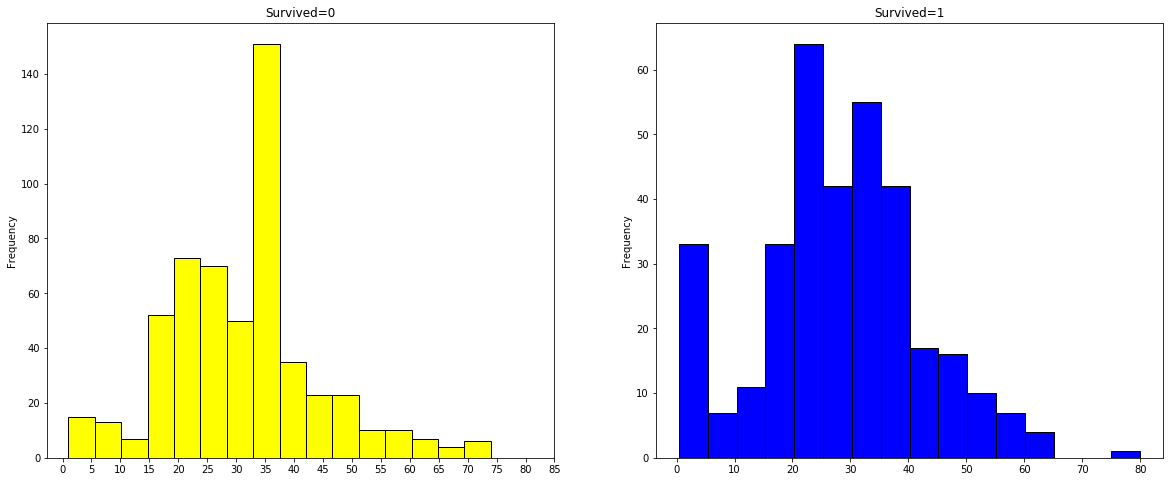

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,8))
train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=16,color='yellow',edgecolor='black')
ax[0].set_title('Survived=0')
x1=list(range(0,90,5))
ax[0].set_xticks(x1)
train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],bins=16,color='blue',edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,90,5))
plt.show()

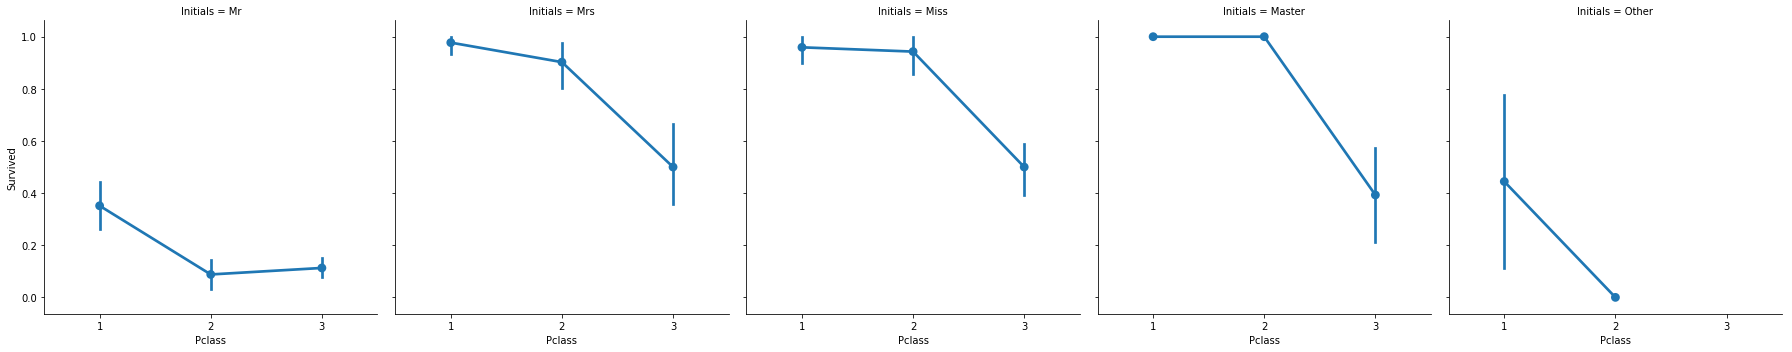

In [26]:
sns.factorplot('Pclass', 'Survived', col='Initials',data=train_df)
plt.show()

The women and children first policy still hold true

# SibSp 

SibSp indicate presence of sibling or spouse

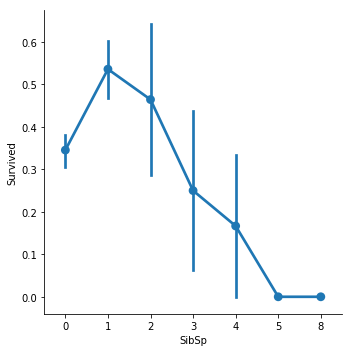

In [27]:
#sns.barplot('SibSp','Survived',data=train_df)
sns.factorplot('SibSp','Survived',data=train_df)
plt.show()

Passenger with one sibling or spouse appear to have the higest chances of survival at 0.54 while the survival rate decreased as SibSp increases. Passenger with no sibling or spouse have about 0.35 chance of survival. 

In [28]:
pd.crosstab(train_df.SibSp,train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


The factorplot shows that if a passenger is alone, he has about 35% chances of survival. Passenger with Sibling and spouse ranging from 1 to 4 showed a decreasing chances of survival respectively. While passengers with more than four(4) siblings and spouse showed 0% chance of survival. The reason might be Pclass?

The reason is Pclass. The crosstab shows that passengers with SibSp>3 were all in Pclass 3. So can be deduced that large families>4 and in Pclass3 all died


# Parch

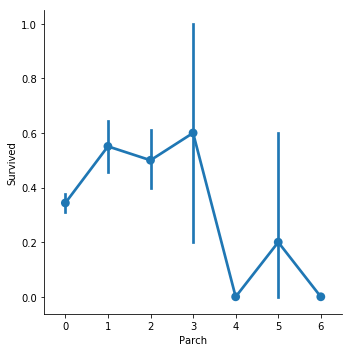

In [29]:
sns.factorplot('Parch','Survived',data=train_df)
plt.show()

Pclass and SibSp are quite similar with respect to survival rate. Passengers with their parent onboard have greater chance of survival which owever reduces as the number goes up.
The chances of survival isgood for somebody who has 1-3 parents onboard. Chances for survival decrease when passenger has >4 parents on ship Being alone proved to have lesser chances of survival too

In [30]:
#pd.crosstab(train_df.Parch,train_df.Sex).style.background_gradient(cmap='summer_r')

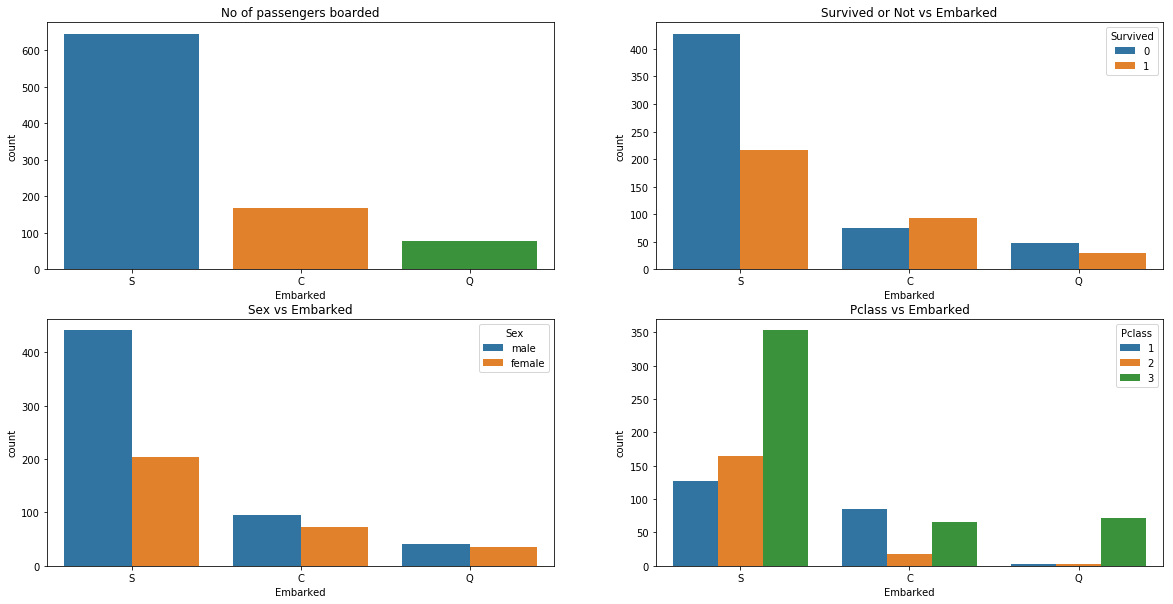

In [31]:
f,ax=plt.subplots(2,2,figsize=(20,10))
sns.countplot('Embarked', data=train_df, ax=ax[0,0])
ax[0,0].set_title('No of passengers boarded')
sns.countplot('Embarked', hue='Survived', data=train_df, ax=ax[0,1])
ax[0,1].set_title('Survived or Not vs Embarked')
sns.countplot('Embarked', hue='Sex', data=train_df, ax=ax[1,0])
ax[1,0].set_title('Sex vs Embarked')
sns.countplot('Embarked', hue='Pclass', data=train_df, ax=ax[1,1])
ax[1,1].set_title('Pclass vs Embarked')
plt.show()

The largest number of passengers embarked at port S while the smallest at port Q. Port S with its large no of passengers(containing majority of rich people) showed low chances of survival so also as Port Q. This might be because a large portion of Port S and Q belong to Pclass 3.
While port C survived better than the other ports. This might be because of rescue of all the Pclass 1 and 2.

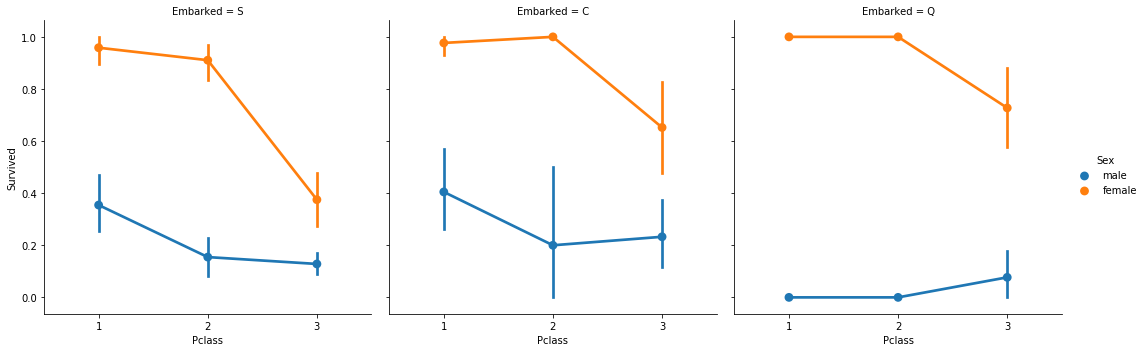

In [32]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked', data=train_df)
plt.show()

1) The survival rate are almost 1(>90% but <100%) for women irrespective of the Pclass. Though women in Embarked S appeared to be unlucky for Pclass 3
2) Men of Embarked Q Pclass 3 showed high survival rate than both Pclass 1 and 2. This is because most of the passengers belong to Pclass 3 

Filling Embarked null values

In [33]:
#Port S has the maximum passengers hence the mode
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

# Feature engineering

Family_size and Alone

At this point we can generate new features from summary of Parch and SibSp. It gives us the family size of passengers onboard. Alone will denote whether a passenger is alone on the ship or not.

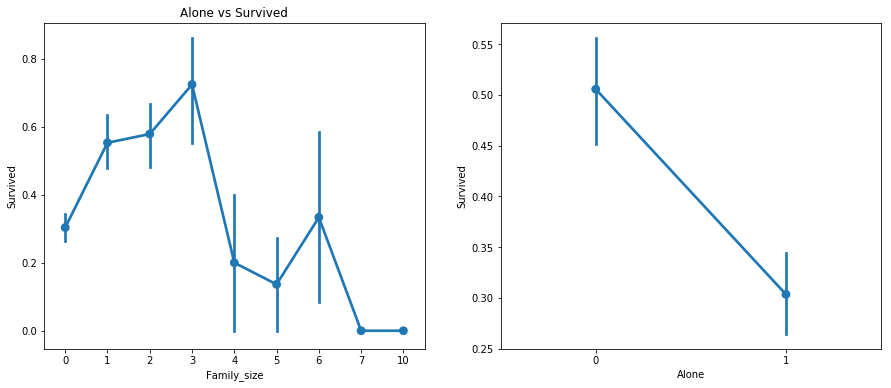

In [34]:
train_df['Family_size']=0
train_df['Family_size']=train_df['Parch']+train_df['SibSp']#family size
train_df['Alone']=0
train_df.loc[train_df['Family_size']==0, 'Alone']=1 #Alone is true

test_df['Family_size']=0
test_df['Family_size']=test_df['Parch']+test_df['SibSp']#family size
test_df['Alone']=0
test_df.loc[test_df['Family_size']==0, 'Alone']=1 #Alone is true

f,ax=plt.subplots(1,2, figsize=(15,6))
sns.factorplot('Family_size','Survived',data=train_df, ax=ax[0])
ax[0].set_title('Family_size vs Survived')
sns.factorplot('Alone','Survived',data=train_df, ax=ax[1])
ax[0].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)# the close is used to remove graph frames on row 2 and 3
plt.show()

Family_size=0 means that passenger is alone. Clearly, being alone or with zero family size lead to a low chance of survival. For family_size greater than 3 then chances of surviving reduces

On further inspection,

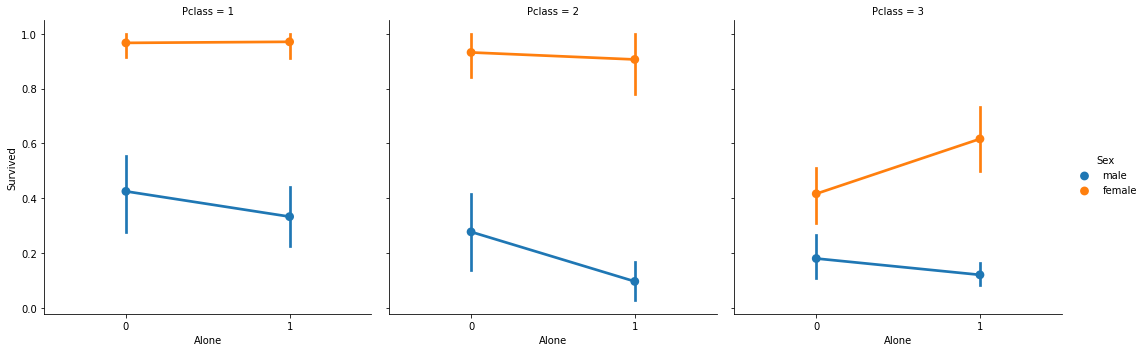

In [35]:
sns.factorplot('Alone','Survived',data=train_df, hue='Sex',col='Pclass')
plt.show()

From Pclass 3 chances of female who are alone to survive is higher than those with family. This is unlike other female

In [36]:
#Age_band
#converting Age which is a continuous feature into categorical features through binning in this case
train_df['Age_band']=0
train_df.loc[train_df['Age']<=16, 'Age_band']=0
train_df.loc[(train_df['Age']>16)&(train_df['Age']<=32),'Age_band']=1
train_df.loc[(train_df['Age']>32)&(train_df['Age']<=48),'Age_band']=2
train_df.loc[(train_df['Age']>48)&(train_df['Age']<=64),'Age_band']=3
train_df.loc[train_df['Age']>64,'Age_band']=4

test_df['Age_band']=0
test_df.loc[test_df['Age']<=16, 'Age_band']=0
test_df.loc[(test_df['Age']>16)&(test_df['Age']<=32),'Age_band']=1
test_df.loc[(test_df['Age']>32)&(test_df['Age']<=48),'Age_band']=2
test_df.loc[(test_df['Age']>48)&(test_df['Age']<=64),'Age_band']=3
test_df.loc[test_df['Age']>64,'Age_band']=4

In [37]:
train_df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


In [38]:
#Fare_range
#binning
train_df['Fare_range']=pd.qcut(train_df['Fare'],5)
test_df['Fare_range']=pd.qcut(test_df['Fare'],5)

train_df.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


In [39]:
train_df['Fare_cat']=0
train_df.loc[train_df['Fare']<=7.854, 'Fare_cat']=0
train_df.loc[(train_df['Fare']>7.854)&(train_df['Fare']<=10.5),'Fare_cat']=1
train_df.loc[(train_df['Fare']>10.5)&(train_df['Fare']<=21.679),'Fare_cat']=2
train_df.loc[(train_df['Fare']>21.679)&(train_df['Fare']<=39.688),'Fare_cat']=3
train_df.loc[(train_df['Fare']>39.688)&(train_df['Fare']<=512.329),'Fare_cat']=4

test_df['Fare_cat']=0
test_df.loc[test_df['Fare']<=7.854, 'Fare_cat']=0
test_df.loc[(test_df['Fare']>7.854)&(test_df['Fare']<=10.5),'Fare_cat']=1
test_df.loc[(test_df['Fare']>10.5)&(test_df['Fare']<=21.679),'Fare_cat']=2
test_df.loc[(test_df['Fare']>21.679)&(test_df['Fare']<=39.688),'Fare_cat']=3
test_df.loc[(test_df['Fare']>39.688)&(test_df['Fare']<=512.329),'Fare_cat']=4

In [40]:
#coverting categorical feature to numerical 
"""train_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_df['Initials'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_df['Initials'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)"""

train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)


In [41]:
test_df.shape

(418, 17)

In [42]:
train_df=pd.get_dummies(train_df,columns=['Embarked'])
test_df=pd.get_dummies(test_df,columns=['Embarked'])

train_df=pd.get_dummies(train_df,columns=['Initials'])
test_df=pd.get_dummies(test_df,columns=['Initials'])


In [43]:
#dropping features not needed
train_df.drop(['Name','Ticket','Cabin','PassengerId','Fare','Fare_range','Age'], axis=1,inplace=True)
test_df.drop(['Name','Ticket','Cabin','PassengerId','Fare','Fare_range','Age','Initials_Dona'], axis=1,inplace=True)
#We dropped an additional column  in the test dataset to have a test dataset with equal column labels as the train dataset 

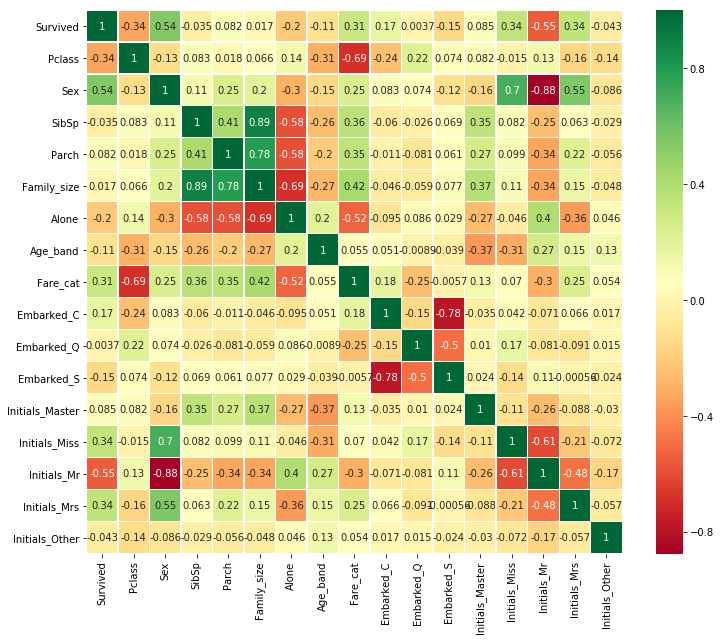

In [44]:
#Correlation between features
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

In [45]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Family_size,Alone,Age_band,Fare_cat,Embarked_C,Embarked_Q,Embarked_S,Initials_Master,Initials_Miss,Initials_Mr,Initials_Mrs,Initials_Other
0,0,3,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
1,1,1,1,1,0,1,0,2,4,1,0,0,0,0,0,1,0
2,1,3,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0
3,1,1,1,1,0,1,0,2,4,0,0,1,0,0,0,1,0
4,0,3,0,0,0,0,1,2,1,0,0,1,0,0,1,0,0


# Training the model

In [46]:
y=train_df['Survived']
x=train_df.drop(['Survived'],axis=1)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y,stratify=y, train_size=0.75, random_state=42)

In [48]:
x_train.shape, y_train.shape

((668, 16), (668,))

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred=log_reg.predict(x_test)
y_pred.shape

(223,)

In [51]:
score=cross_val_score(log_reg, x, y, cv=10, scoring='accuracy')
score.mean()

0.8238417886732494

In [52]:
accuracy_score(y_pred, y_test)

0.8251121076233184

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       138
           1       0.77      0.78      0.77        85

   micro avg       0.83      0.83      0.83       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



array([[118,  20],
       [ 19,  66]], dtype=int64)

In [54]:
#Using Decision tree algorithm to fit the model
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
y_pred1=decision_tree.predict(x_test)
score=cross_val_score(decision_tree, x, y, cv=10, scoring='accuracy')
score.mean()

0.8125924980138463

In [56]:
accuracy_score(y_pred1, y_test)

0.7757847533632287

In [57]:
print(classification_report(y_pred1, y_test))
confusion_matrix(y_pred1, y_test)

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       149
           1       0.64      0.74      0.69        74

   micro avg       0.78      0.78      0.78       223
   macro avg       0.75      0.77      0.76       223
weighted avg       0.79      0.78      0.78       223



array([[118,  31],
       [ 19,  55]], dtype=int64)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
y_pred2=rf.predict(x_test)
score=cross_val_score(rf, x, y, cv=10, scoring='accuracy')
score.mean()

0.8115066394279878

In [60]:
accuracy_score(y_pred2, y_test)

0.7713004484304933

In [61]:
print(classification_report(y_pred2, y_test))
confusion_matrix(y_pred2, y_test)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       138
           1       0.70      0.71      0.70        85

   micro avg       0.77      0.77      0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



array([[112,  26],
       [ 25,  60]], dtype=int64)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbcf=GradientBoostingClassifier(random_state=0)
gbcf.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [63]:
y_pred3=gbcf.predict(x_test)
score=cross_val_score(gbcf, x, y, cv=10, scoring='accuracy')
score.mean()

0.8205461922596754

In [64]:
accuracy_score(y_pred3, y_test)

0.8116591928251121

In [65]:
from sklearn.model_selection import GridSearchCV

maximum_depth = [1,2,3,4,5]
min_samples_split= [2,3,4,6]
learning_rate=[0.01,0.1,1]

param_grid= {'max_depth': maximum_depth, 'min_samples_split':min_samples_split, 'learning_rate':learning_rate}

grid= GridSearchCV(gbcf, param_grid = param_grid,scoring = 'accuracy', cv = 10,n_jobs = -1)
grid.fit(x_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 6], 'learning_rate': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [66]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'min_samples_split': 2}

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbcf1=GradientBoostingClassifier(learning_rate=0.1, max_depth=1, min_samples_split=2, random_state=0)
gbcf1.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [68]:
y_pred4=gbcf1.predict(x_test)
score=cross_val_score(gbcf1, x, y, cv=10, scoring='accuracy')
score.mean()

0.8305078878674385

In [69]:
accuracy_score(y_pred4, y_test)

0.8251121076233184

In [70]:
print(classification_report(y_pred4, y_test))
confusion_matrix(y_pred4, y_test)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       142
           1       0.74      0.79      0.77        81

   micro avg       0.83      0.83      0.83       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.83      0.83       223



array([[120,  22],
       [ 17,  64]], dtype=int64)

# Predicting on the test_df 

In [71]:

prediction=gbcf1.predict(test_df)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,